> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDB Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## TMDB Data Set 
This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),<br>
including user ratings and revenue.

# Questions to explore the dataset for.

### 1)What is the highest profit for each genrefrom 1960 to 2015?
### 2)What is the highest profit for each production company from 1960 to 2015?
### 3)What is the highest profit for each director movies from 1960 to 2015?
### 4)What is the relation between Runtime of a Movie and it's vote_average ?
### 5) what is the Relation between number of movies released and release year?
### 6)What is the highest count of voters in each year?

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.drop(['imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj', 'release_date'], axis=1, inplace=True)
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


## Create a profit column in our dataframe to be able to answer questions easier

In [6]:
df['profit']=df['revenue']-df['budget']
df.profit.head()

0    1363528810
1     228436354
2     185238201
3    1868178225
4    1316249360
Name: profit, dtype: int64

### Cleaning and exploring the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
 12  profit                10866 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.1+ MB


## We find missing values in director, genres, and production companies
### we drop these rows as we filling them may make the dataset biased

In [8]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9807 entries, 0 to 9806
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 9807 non-null   int64  
 1   id                    9807 non-null   int64  
 2   popularity            9807 non-null   float64
 3   budget                9807 non-null   int64  
 4   revenue               9807 non-null   int64  
 5   original_title        9807 non-null   object 
 6   director              9807 non-null   object 
 7   runtime               9807 non-null   int64  
 8   genres                9807 non-null   object 
 9   production_companies  9807 non-null   object 
 10  vote_count            9807 non-null   int64  
 11  vote_average          9807 non-null   float64
 12  release_year          9807 non-null   int64  
 13  profit                9807 non-null   int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.0+ MB


In [9]:
df.release_year.describe()

count    9807.000000
mean     2000.891200
std        13.032032
min      1960.000000
25%      1994.000000
50%      2005.000000
75%      2011.000000
max      2015.000000
Name: release_year, dtype: float64

we find that this data ranges from 1960 to 2015

<a id='eda'></a>
## Exploratory Data Analysis


### 1)What is the highest profit for each genre in all years?

### We start by getting genres in a dictionary 

In [10]:
genres=[]
for i in df.index:
    genres.extend(df.iloc[i,8].split('|'))
genres=dict.fromkeys(genres,0)
genres

{'Action': 0,
 'Adventure': 0,
 'Science Fiction': 0,
 'Thriller': 0,
 'Fantasy': 0,
 'Crime': 0,
 'Western': 0,
 'Drama': 0,
 'Family': 0,
 'Animation': 0,
 'Comedy': 0,
 'Mystery': 0,
 'Romance': 0,
 'War': 0,
 'History': 0,
 'Music': 0,
 'Horror': 0,
 'Documentary': 0,
 'TV Movie': 0,
 'Foreign': 0}

### Then get the total profit of movies in each genre

In [11]:
#we iterate over every index in the dataframe
for i in df.index:
    #extract the list of genres the movie is under
    G=df.iloc[i,8].split('|')
    # iterate over each genre of them and add to it the profit of the movie
    for genre in G:
        genres[genre]+=df.iloc[i,13]
genres

{'Action': 107540425634,
 'Adventure': 111216306097,
 'Science Fiction': 55498225885,
 'Thriller': 71402548810,
 'Fantasy': 58370575641,
 'Crime': 33500913873,
 'Western': 1583109216,
 'Drama': 82656036667,
 'Family': 60428716422,
 'Animation': 36404581745,
 'Comedy': 91947521248,
 'Mystery': 19507720245,
 'Romance': 39663524435,
 'War': 7252990243,
 'History': 4538119745,
 'Music': 7825491647,
 'Horror': 17374298706,
 'Documentary': 720945243,
 'TV Movie': -2700000,
 'Foreign': -60836958}

### We find that TV Movie, and Foreign are losing profit so we drop them from the dataframe genres

In [12]:
genres.pop("TV Movie")
genres.pop("Foreign")
genres

{'Action': 107540425634,
 'Adventure': 111216306097,
 'Science Fiction': 55498225885,
 'Thriller': 71402548810,
 'Fantasy': 58370575641,
 'Crime': 33500913873,
 'Western': 1583109216,
 'Drama': 82656036667,
 'Family': 60428716422,
 'Animation': 36404581745,
 'Comedy': 91947521248,
 'Mystery': 19507720245,
 'Romance': 39663524435,
 'War': 7252990243,
 'History': 4538119745,
 'Music': 7825491647,
 'Horror': 17374298706,
 'Documentary': 720945243}

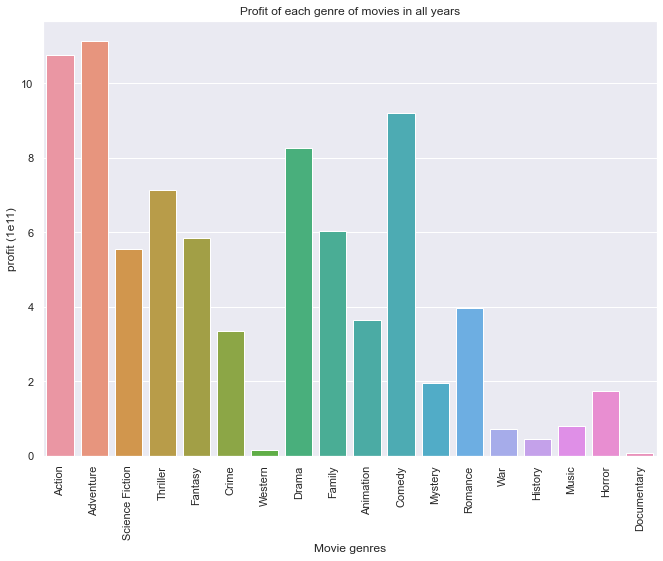

In [13]:
keys=list(genres.keys())
values =[genres[k]/1e10 for k in keys]
sns.set(rc={'figure.figsize':(11,8)})
sns.barplot(x=keys,y=values)
plt.xticks(rotation=90)
plt.xlabel('Movie genres')
plt.ylabel("profit (1e11)")
plt.title("Profit of each genre of movies in all years")
plt.show()

### We find that Adventure movies are the highest movies with profit,<br> and Documentries are the least movies with profit<br>


### 2)What is the highest profit for each production company in all years?

### We do like we did with genres because we can see that a movie can have more than one production company

In [14]:
prods=[]
for i in df.index:
    #the 10th column is the production companies column
    prods.extend(df.iloc[i,9].split('|'))
prods=dict.fromkeys(prods,0)
prods

{'Universal Studios': 0,
 'Amblin Entertainment': 0,
 'Legendary Pictures': 0,
 'Fuji Television Network': 0,
 'Dentsu': 0,
 'Village Roadshow Pictures': 0,
 'Kennedy Miller Productions': 0,
 'Summit Entertainment': 0,
 'Mandeville Films': 0,
 'Red Wagon Entertainment': 0,
 'NeoReel': 0,
 'Lucasfilm': 0,
 'Truenorth Productions': 0,
 'Bad Robot': 0,
 'Universal Pictures': 0,
 'Original Film': 0,
 'Media Rights Capital': 0,
 'One Race Films': 0,
 'Regency Enterprises': 0,
 'Appian Way': 0,
 'CatchPlay': 0,
 'Anonymous Content': 0,
 'New Regency Pictures': 0,
 'Paramount Pictures': 0,
 'Skydance Productions': 0,
 'Twentieth Century Fox Film Corporation': 0,
 'Scott Free Productions': 0,
 'Mid Atlantic Films': 0,
 'International Traders': 0,
 'TSG Entertainment': 0,
 'Illumination Entertainment': 0,
 'Walt Disney Pictures': 0,
 'Pixar Animation Studios': 0,
 'Walt Disney Studios Motion Pictures': 0,
 'Columbia Pictures': 0,
 'Danjaq': 0,
 'B24': 0,
 'Dune Entertainment': 0,
 'Anarchos Pro

In [15]:
#we iterate over every index in the dataframe
for i in df.index:
    #extract the list of genres the movie is under
    P=df.iloc[i,9].split('|')
    # iterate over each genre of them and add to it the profit of the movie
    for prod in P:
        prods[prod]+=df.iloc[i,13]
prods

{'Universal Studios': 1900371400,
 'Amblin Entertainment': 12443416032,
 'Legendary Pictures': 8179622304,
 'Fuji Television Network': 1614853804,
 'Dentsu': 4102842963,
 'Village Roadshow Pictures': 7888418240,
 'Kennedy Miller Productions': 926171166,
 'Summit Entertainment': 4939051192,
 'Mandeville Films': 634165918,
 'Red Wagon Entertainment': 1020983109,
 'NeoReel': 478069029,
 'Lucasfilm': 7671385005,
 'Truenorth Productions': 1868178225,
 'Bad Robot': 3846286122,
 'Universal Pictures': 32575422791,
 'Original Film': 4801465136,
 'Media Rights Capital': 2726157511,
 'One Race Films': 1366646010,
 'Regency Enterprises': 4892191532,
 'Appian Way': 1165142531,
 'CatchPlay': 391333449,
 'Anonymous Content': 686255797,
 'New Regency Pictures': 1853732180,
 'Paramount Pictures': 27538581413,
 'Skydance Productions': 2541583935,
 'Twentieth Century Fox Film Corporation': 27402754987,
 'Scott Free Productions': 2572671799,
 'Mid Atlantic Films': 810432674,
 'International Traders': 4565

We find 0s and negative values , this means this companies lost money or the movies just covered the budget 

In [16]:
# We create a filtered dictionary of companies that have positive profit
filtered_prods={k:v for k,v in prods.items() if v>0}
filtered_prods=dict(sorted(filtered_prods.items(), key=lambda item: item[1],reverse=True))

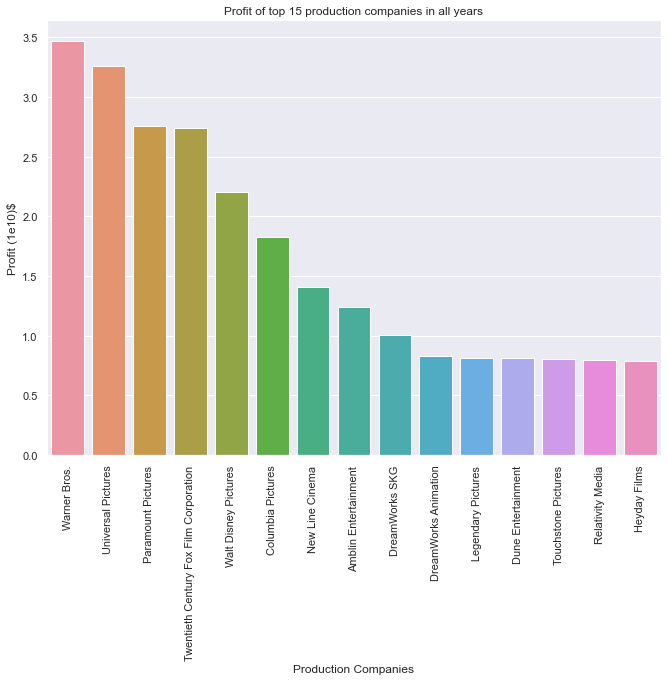

In [17]:
#we extract all keys
keys=list(filtered_prods.keys())
#we extract profit of the top 15 companies
values =[filtered_prods[k]/1e10 for k in keys[:15]]
sns.set(rc={'figure.figsize':(11,8)})
sns.barplot(x=keys[:15],y=values)
plt.xticks(rotation=90)
plt.xlabel('Production Companies')
plt.ylabel("Profit (1e10)$")
plt.title("Profit of top 15 production companies in all years")
plt.show()

### 3)What is the highest profit for each movie Director in all years?

In [18]:
directors=[]
for i in df.index:
    directors.extend(df.iloc[i,6].split('|'))
directors=dict.fromkeys(directors,0)
directors

{'Colin Trevorrow': 0,
 'George Miller': 0,
 'Robert Schwentke': 0,
 'J.J. Abrams': 0,
 'James Wan': 0,
 'Alejandro GonzÃ¡lez IÃ±Ã¡rritu': 0,
 'Alan Taylor': 0,
 'Ridley Scott': 0,
 'Kyle Balda': 0,
 'Pierre Coffin': 0,
 'Pete Docter': 0,
 'Sam Mendes': 0,
 'Lana Wachowski': 0,
 'Lilly Wachowski': 0,
 'Alex Garland': 0,
 'Chris Columbus': 0,
 'Joss Whedon': 0,
 'Quentin Tarantino': 0,
 'Olivier Megaton': 0,
 'Peyton Reed': 0,
 'Kenneth Branagh': 0,
 'Francis Lawrence': 0,
 'Brad Bird': 0,
 'Antoine Fuqua': 0,
 'Brad Peyton': 0,
 'Sam Taylor-Johnson': 0,
 'Adam McKay': 0,
 'Christopher McQuarrie': 0,
 'Seth MacFarlane': 0,
 'Matthew Vaughn': 0,
 'Tom McCarthy': 0,
 'Wes Ball': 0,
 'Bill Condon': 0,
 'Neill Blomkamp': 0,
 'Elizabeth Banks': 0,
 'Steven Spielberg': 0,
 'Rob Letterman': 0,
 'Lenny Abrahamson': 0,
 'Afonso Poyart': 0,
 'Peter Sohn': 0,
 'Jaume Collet-Serra': 0,
 'John Crowley': 0,
 'F. Gary Gray': 0,
 'Breck Eisner': 0,
 'Danny Boyle': 0,
 'Guy Ritchie': 0,
 'Lee Toland Kri

In [19]:
#we iterate over every index in the dataframe
for i in df.index:
    #extract the list of genres the movie is under
    dirctrs=df.iloc[i,6].split('|')
    # iterate over each genre of them and add to it the profit of the movie
    for dirctr in dirctrs:
        directors[dirctr]+=df.iloc[i,13]
directors

{'Colin Trevorrow': 1366786602,
 'George Miller': 748939633,
 'Robert Schwentke': 361168754,
 'J.J. Abrams': 2839169916,
 'James Wan': 1813662186,
 'Alejandro GonzÃ¡lez IÃ±Ã¡rritu': 633923618,
 'Alan Taylor': 595368537,
 'Ridley Scott': 2167096480,
 'Kyle Balda': 1361571278,
 'Pierre Coffin': 2452006832,
 'Pete Docter': 1682867609,
 'Sam Mendes': 2049548809,
 'Lana Wachowski': 1277032966,
 'Lilly Wachowski': 1277032966,
 'Alex Garland': 21869414,
 'Chris Columbus': 3224491668,
 'Joss Whedon': 2424463141,
 'Quentin Tarantino': 1253540411,
 'Olivier Megaton': 708858133,
 'Peyton Reed': 745340963,
 'Kenneth Branagh': 820038143,
 'Francis Lawrence': 2476979588,
 'Brad Bird': 1535073263,
 'Antoine Fuqua': 450580977,
 'Brad Peyton': 664667356,
 'Sam Taylor-Johnson': 529651467,
 'Adam McKay': 517576455,
 'Christopher McQuarrie': 690670734,
 'Seth MacFarlane': 647231921,
 'Matthew Vaughn': 646321390,
 'Tom McCarthy': 85584009,
 'Wes Ball': 564576787,
 'Bill Condon': 1416411758,
 'Neill Blomkam

In [20]:
# We create a filtered dictionary of directors that have positive profit
filtered_dircts={k:v for k,v in directors.items() if v>0}
filtered_dircts=dict(sorted(filtered_dircts.items(), key=lambda item: item[1],reverse=True))

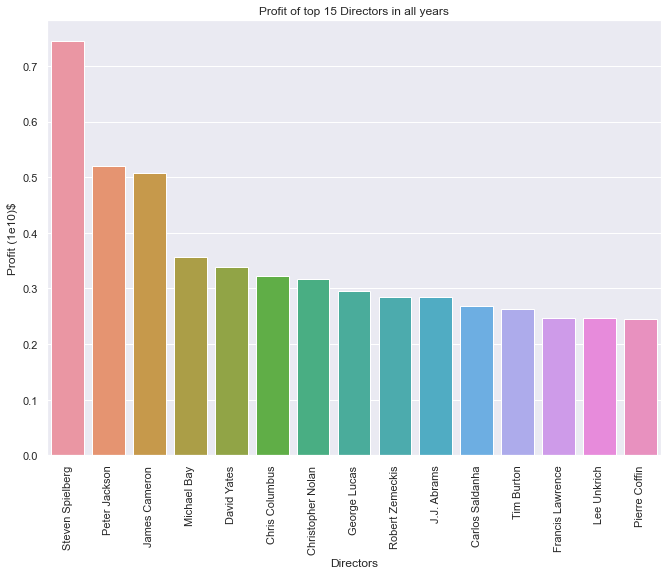

In [21]:
#we extract all keys
keys=list(filtered_dircts.keys())
#we extract profit of the top 15 companies
values =[filtered_dircts[k]/1e10 for k in keys[:15]]
sns.set(rc={'figure.figsize':(11,8)})
sns.barplot(x=keys[:15],y=values)
plt.xticks(rotation=90)
plt.xlabel('Directors')
plt.ylabel("Profit (1e10)$")
plt.title("Profit of top 15 Directors in all years")
plt.show()

### 4)What is the relation between Runtime of a Movie and it's vote average?

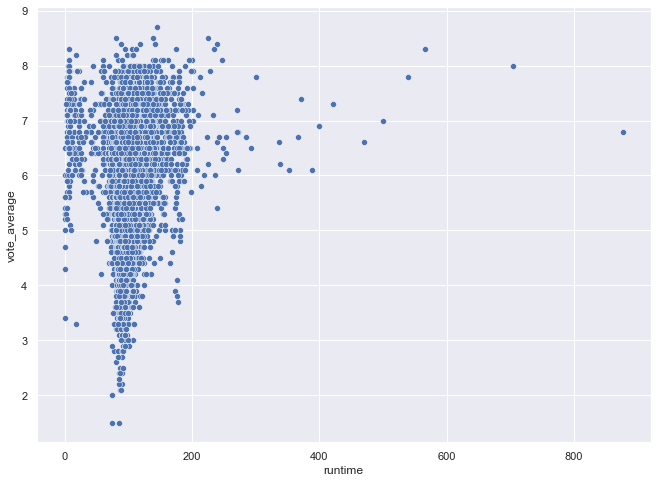

In [22]:
sns.scatterplot(data=df,x='runtime',y='vote_average');

We can see that movies that exceed 200 have an average vote above 5 while we cant see a specific pattern for movies under 200 mins, nevertheless they are very small in terms to the rest of the data and we cant really be sure that longer movies have a better vote average.

### 5) what is the Relation between number of movies released and release year?

In [23]:
df.groupby('release_year')['index'].count()

release_year
1960     32
1961     30
1962     30
1963     34
1964     41
1965     34
1966     44
1967     37
1968     37
1969     29
1970     40
1971     55
1972     37
1973     55
1974     44
1975     42
1976     46
1977     55
1978     61
1979     56
1980     73
1981     78
1982     80
1983     77
1984    100
1985    106
1986    110
1987    114
1988    133
1989    129
1990    126
1991    125
1992    127
1993    172
1994    174
1995    170
1996    196
1997    180
1998    191
1999    212
2000    197
2001    212
2002    243
2003    254
2004    253
2005    324
2006    353
2007    392
2008    443
2009    474
2010    422
2011    461
2012    500
2013    568
2014    638
2015    561
Name: index, dtype: int64

Text(0.5, 1.0, 'Years to number of movies released at it.')

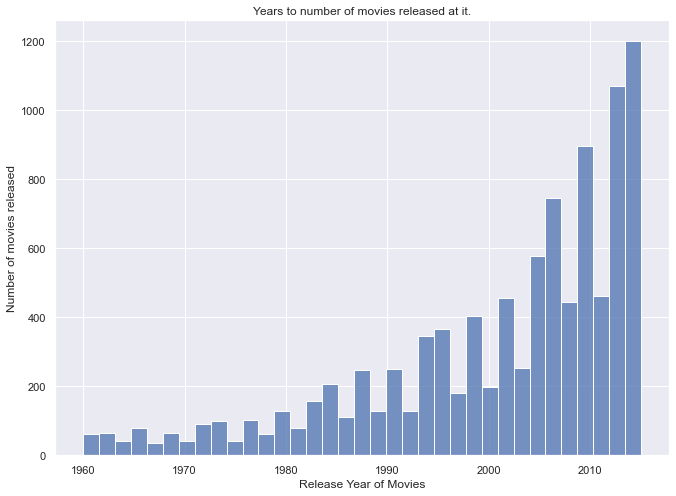

In [24]:
sns.histplot(data=df,x='release_year');
plt.ylabel("Number of movies released")
plt.xlabel("Release Year of Movies")
plt.title("Years to number of movies released at it.")

we can see that as we go further in time more movies are released each year

### 6)What is the highest count of voters in each year?

In [25]:
df.groupby('release_year')['vote_count'].sum()

release_year
1960      2481
1961      2395
1962      2364
1963      2816
1964      3126
1965      1810
1966      1422
1967      3062
1968      4194
1969      1702
1970      2001
1971      5081
1972      5397
1973      5173
1974      5164
1975      6063
1976      4710
1977      8009
1978      4815
1979      8816
1980     10831
1981      7403
1982     11372
1983      9823
1984     15269
1985     13721
1986     13527
1987     14910
1988     14384
1989     18539
1990     21477
1991     16857
1992     19354
1993     24199
1994     37342
1995     35696
1996     25789
1997     40731
1998     39630
1999     53247
2000     45549
2001     62447
2002     62427
2003     67884
2004     78044
2005     72474
2006     74682
2007     89420
2008    101166
2009    118628
2010    128887
2011    133797
2012    181620
2013    212588
2014    204944
2015    180784
Name: vote_count, dtype: int64

Text(0.5, 1.0, 'Years to number of votes occured at it')

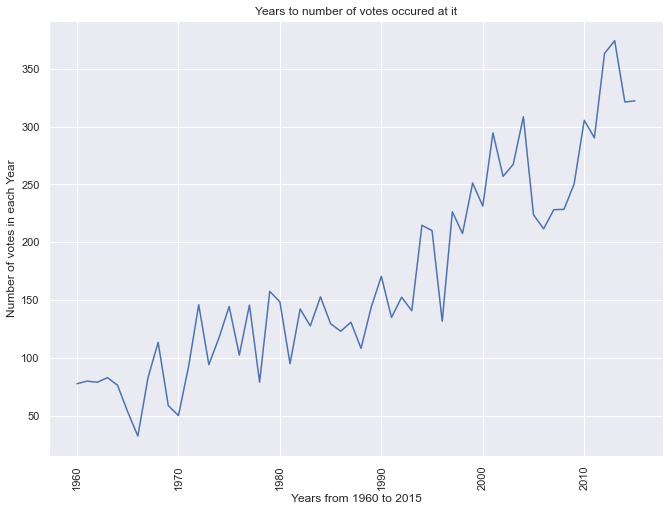

In [26]:
sns.lineplot(data=df,x='release_year',y='vote_count',ci=None)
plt.xticks(rotation=90)
plt.xlabel("Years from 1960 to 2015")
plt.ylabel("Number of votes in each Year")
plt.title('Years to number of votes occured at it')

We can see that the number of voters over time has been increasing

<a id='conclusions'></a>
## Conclusions

### First Conclusion:
We can see from the data that the highest movie genre that made profit was Adventure movies
### Second Conclusion
We can see the highest profit production companies and at first place is Warner Bros 
### Third Conclusion
We found that Steven Speilberg movies where the highest profit movies from 1960 to 2015
### Fourth Conclusion
We found in this data-set that most of the movies runtime range between 0 to 200 minutes, and all of the movies higher than 200 mins of runtime got vote average more than 5.
### Fifth Conclusion
we find that by time the number of movies released is increased each year, at 1960 there was 32 movies released
while at 2015 there was 561 movies released.
### Sixth Conclusion
Voting on movies has incresed over the years from 1960 with 2481 votes to 2015 with 180784 votes.